<div style="text-align:center"> 
    <p style="font-size: 50px; margin-bottom: 0">Death of a Cluster</p>
    <p style="font-size: 20px; font-style: italic">ASTR 511 HW4 - Tom Wagg</p>
    <p>(This title was <a href="https://iopscience.iop.org/article/10.1088/0004-637X/711/2/559">by no means</a> plagiarised...)</p>
</div>

In [1]:
import astropy.coordinates as coord
import astropy.units as u
import numpy as np
import gala.coordinates as gc
import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic

        Use @ instead. [gala.coordinates.sgr]
        Use @ instead. [gala.coordinates.orphan]
        Use @ instead. [gala.coordinates.magellanic_stream]


In [4]:
_ = coord.galactocentric_frame_defaults.set('v4.0')

In [5]:
pot = gp.MilkyWayPotential()

In [12]:
coord.SkyCoord(ra="08h51m03s", dec=11.49, unit=(u.deg, u.deg))

<SkyCoord (ICRS): (ra, dec) in deg
    (132.7625, 11.49)>

Radial velocity from [here](https://arxiv.org/abs/1507.01949)

In [17]:
c = coord.SkyCoord(ra=132.7625 * u.deg, dec=11.49 * u.deg,
                   distance=878 * u.pc,
                   pm_ra_cosdec=-10.97 * u.mas/u.yr,
                   pm_dec=-2.95 * u.mas/u.yr,
                   radial_velocity=33.64 * u.km/u.s)

In [18]:
c_gc = c.transform_to("galactocentric").cartesian
m67_w0 = gd.PhaseSpacePosition(c_gc)

In [25]:
m67_mass = 1138 * u.Msun
m67_radius = (3.16 * u.arcmin).to(u.rad).value * c.distance * 5
m67_pot = gp.PlummerPotential(m=m67_mass, b=m67_radius, units=galactic)

In [26]:
from gala.dynamics import mockstream as ms
df = ms.FardalStreamDF()

In [111]:
gen_m67 = ms.MockStreamGenerator(df, pot, progenitor_potential=m67_pot)
m67_stream, m67_nbody = gen_m67.run(m67_w0, m67_mass, dt=-1 * u.Myr, n_steps=1000,
                                    release_every=10, output_every=1,
                                    output_filename="stream.h5", overwrite=True)

In [59]:
import h5py as h5

In [108]:
with h5.File("stream.h5") as f:
    nbody_orbit = gd.Orbit(pos=f["nbody"]["pos"][...], vel=f["nbody"]["vel"][...], t=f["nbody"]["time"][...])
    # print(f["stream"]["pos"][...])

KeyboardInterrupt: 

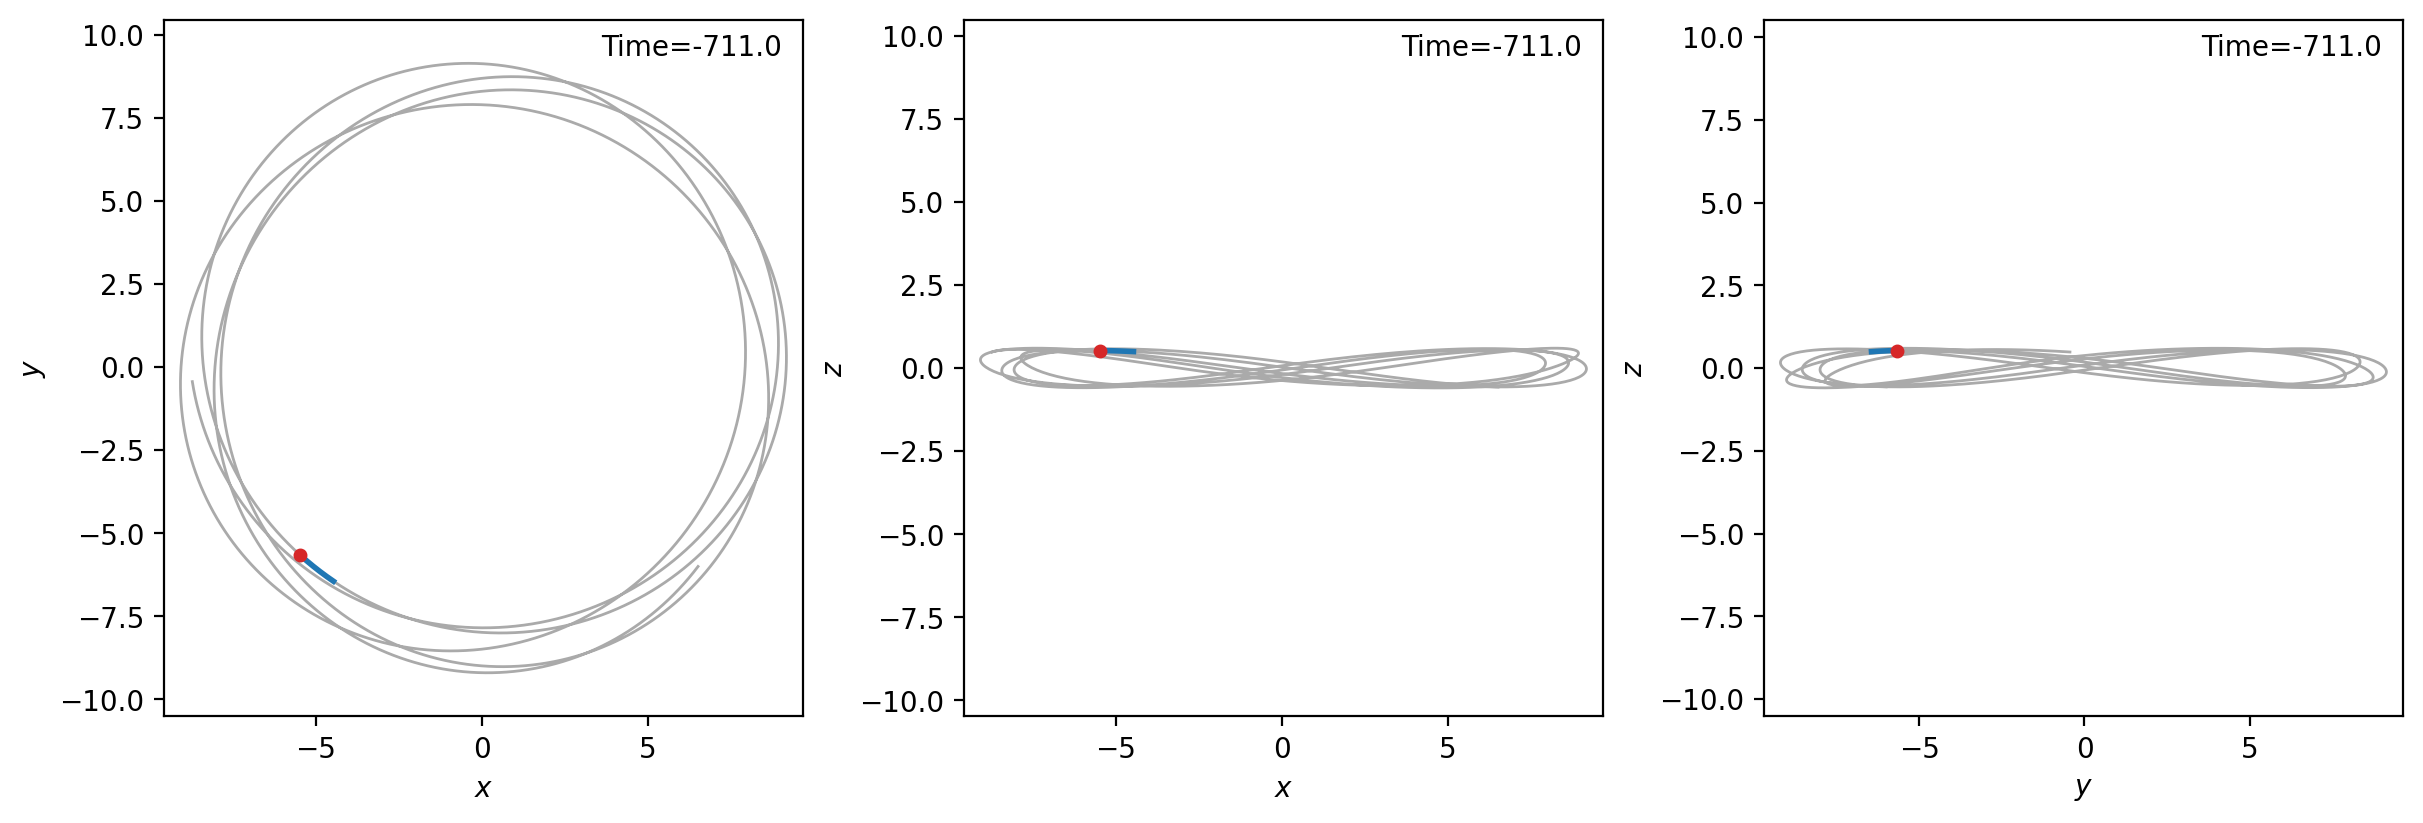

In [109]:
fig, anim = nbody_orbit.animate(stride=1, segment_nsteps=5, underplot_full_orbit=True,
                                FuncAnimation_kwargs={"interval": 1})
anim.save("test.gif")

In [112]:
m67_nbody

<PhaseSpacePosition cartesian, dim=3, shape=(1,)>

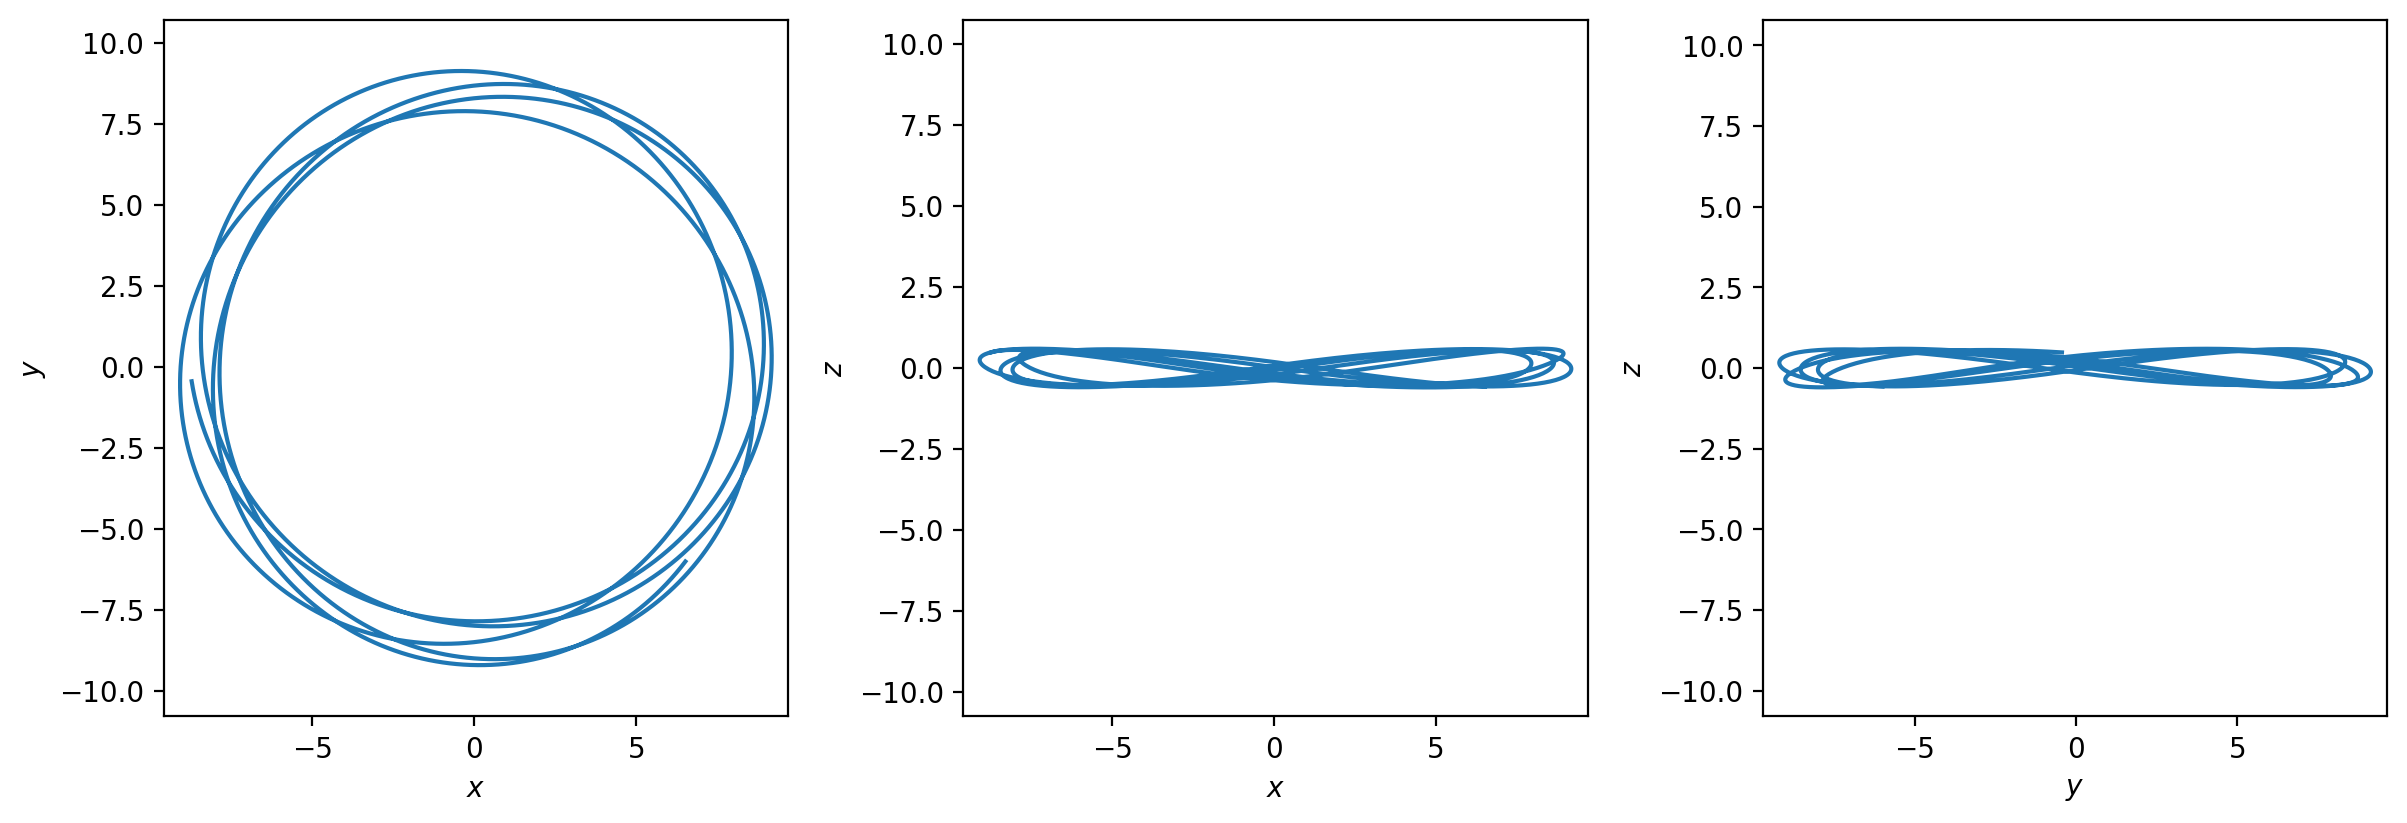

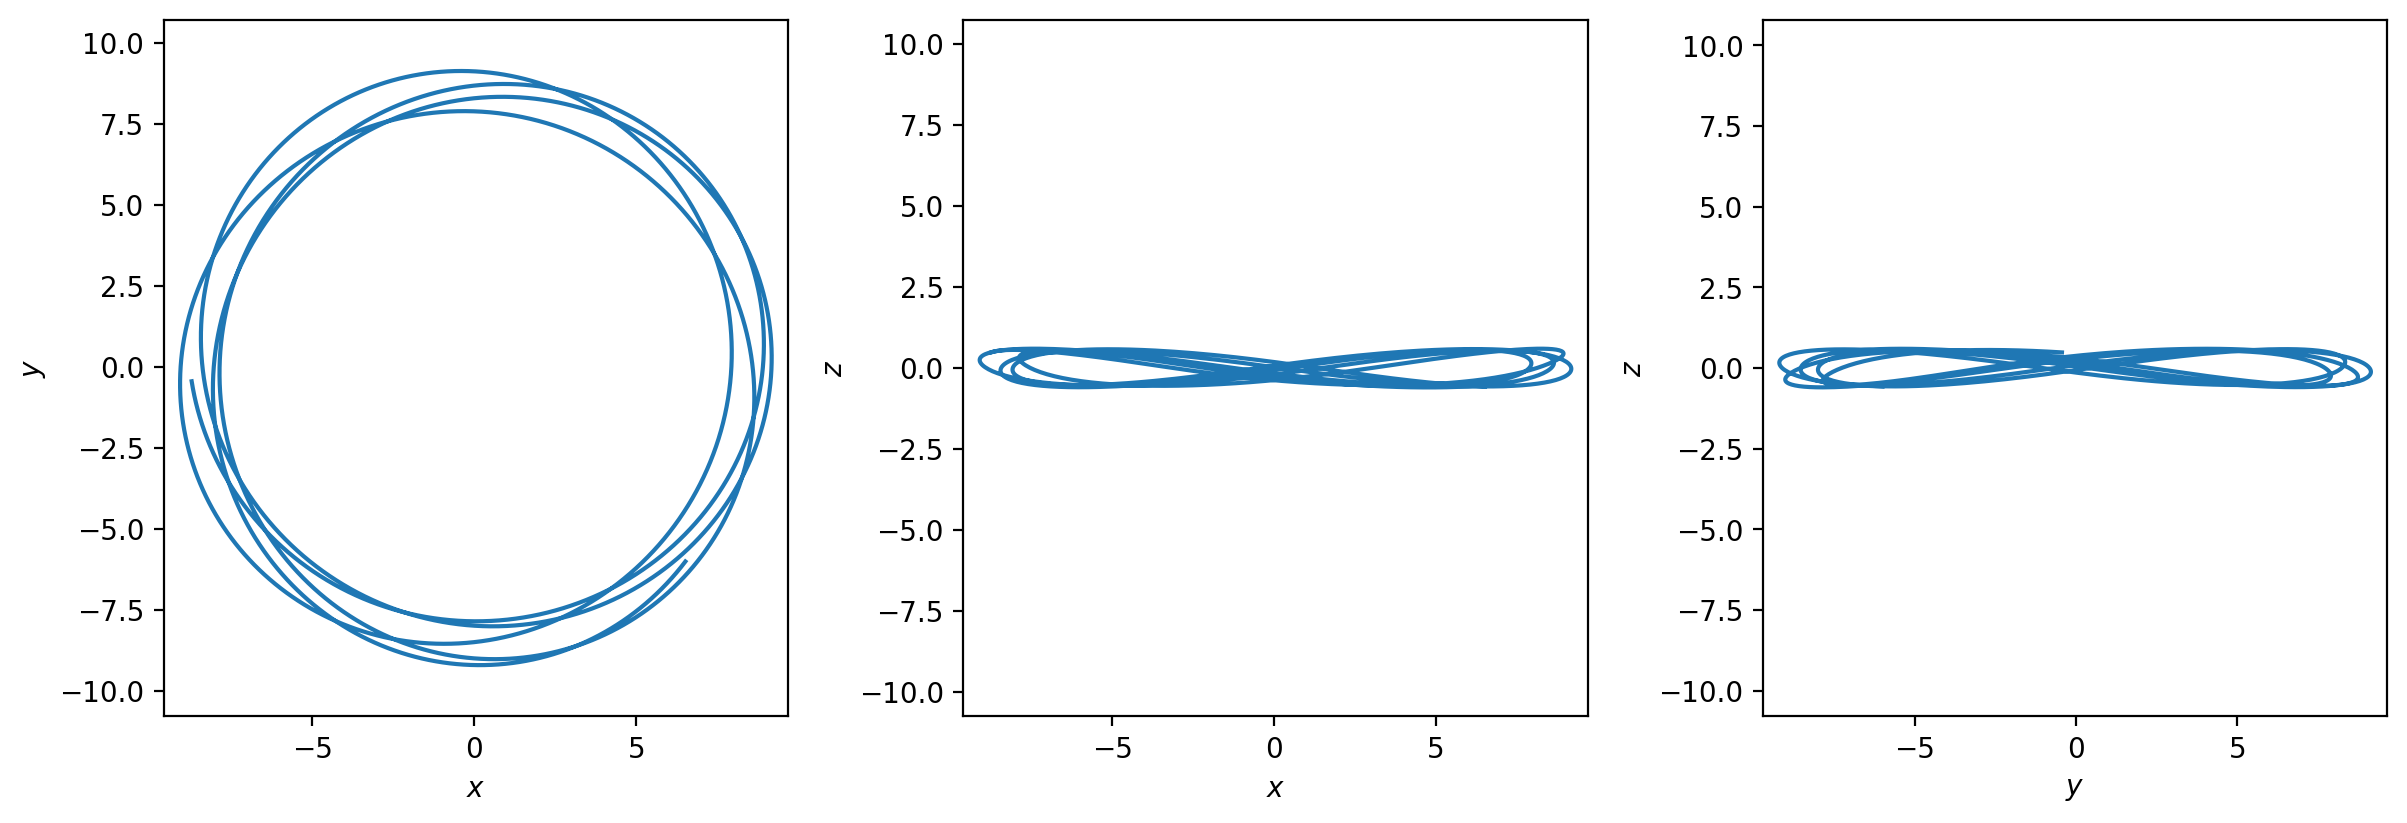

In [110]:
nbody_orbit.plot()

In [53]:
m67_stream

<MockStream cartesian, dim=3, shape=(202,)>

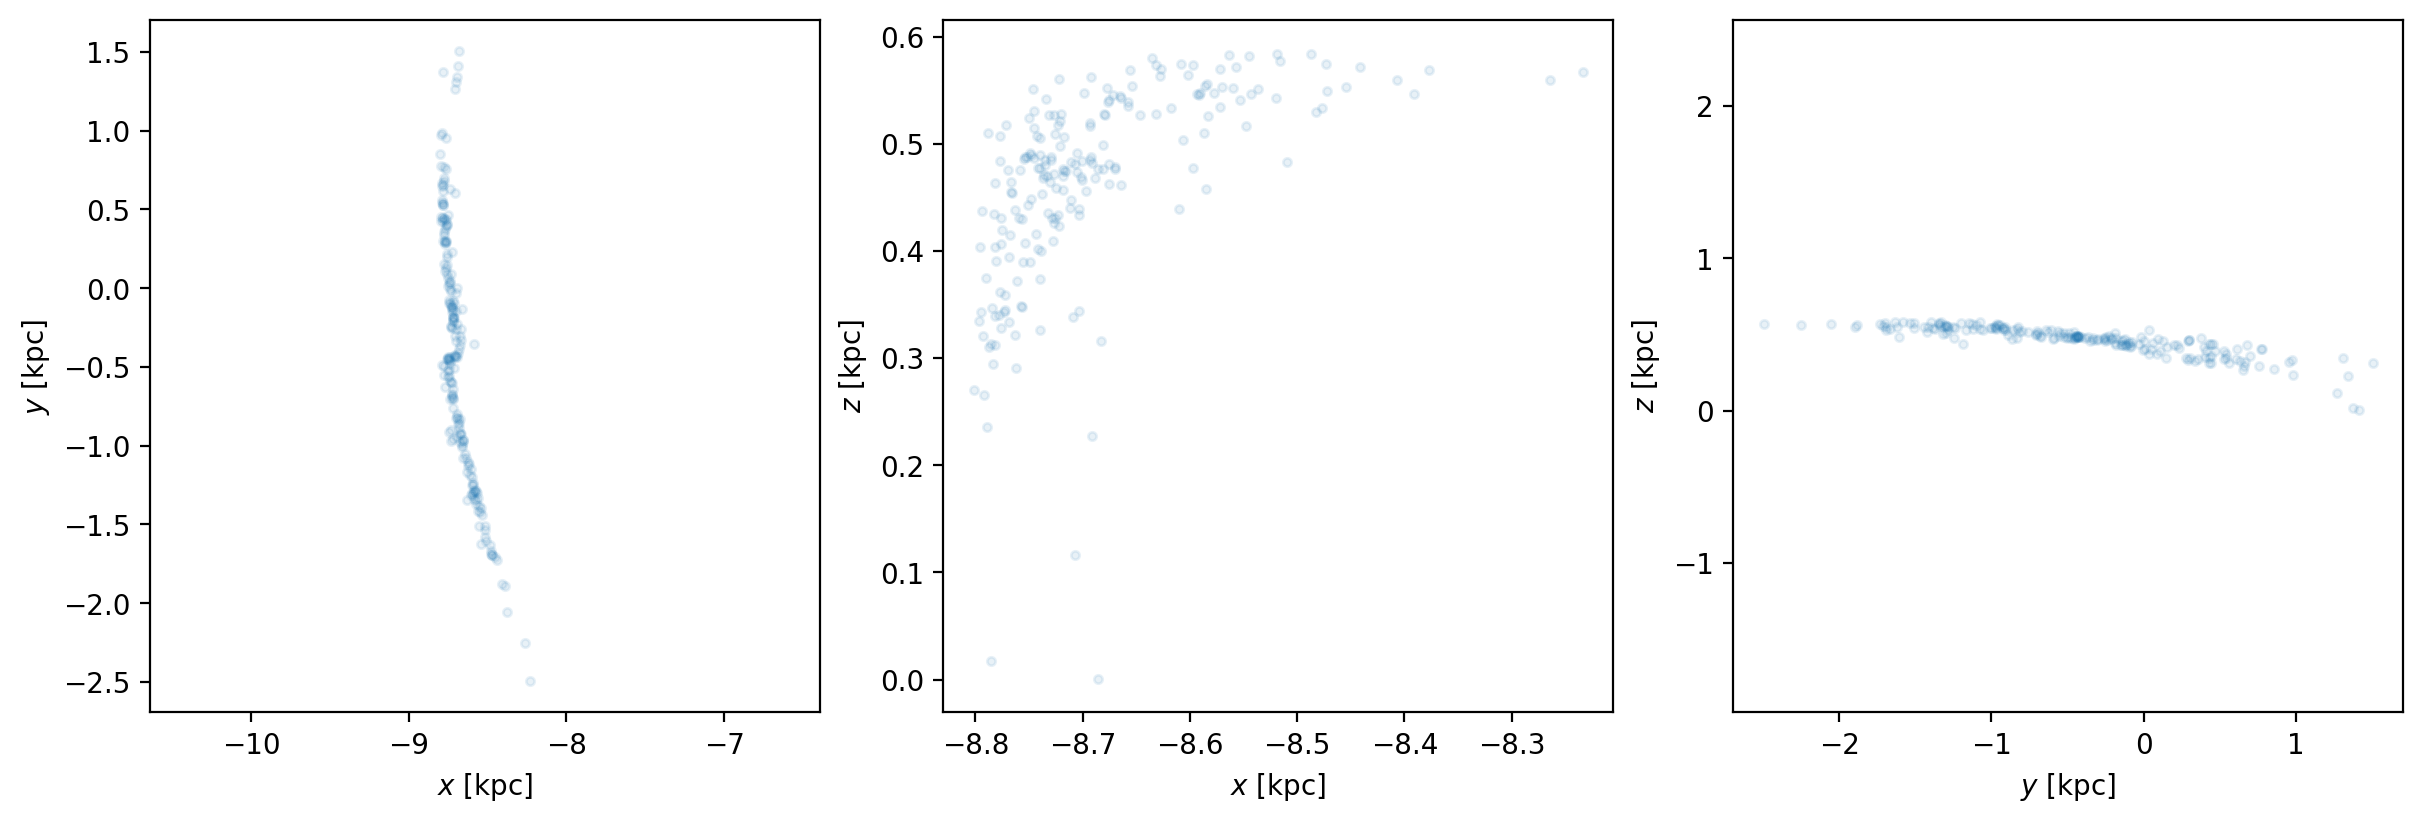

In [52]:
m67_stream.plot(alpha=0.1);

In [113]:
stream_c = m67_stream.to_coord_frame(coord.ICRS)

In [45]:
import matplotlib.pyplot as plt

In [47]:
%config InlineBackend.figure_format = "retina"

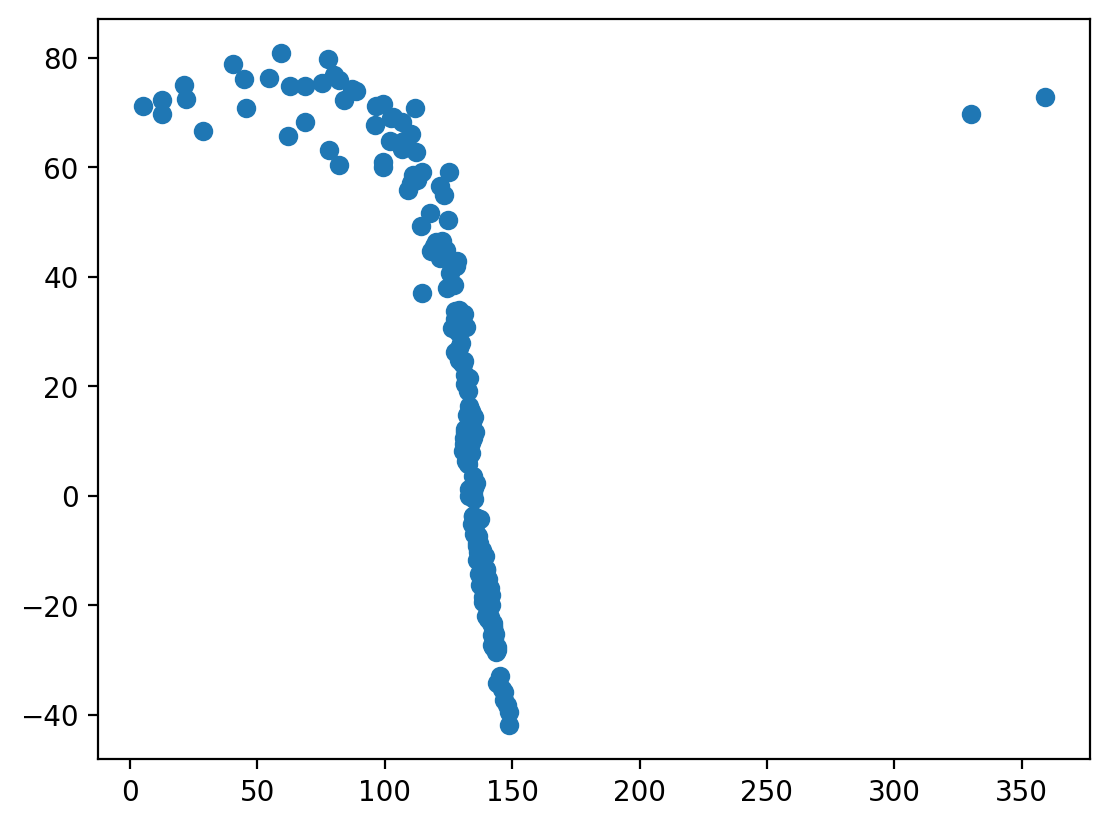

In [114]:
plt.scatter(stream_c.ra, stream_c.dec)